In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train_awoL0xl.csv')

In [3]:
df.head(10)

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7
3,id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7
4,id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7
5,id_5,0,2017-01-10,81.7083,81.3390,80.9486,80.6796,0,7
6,id_6,0,2017-01-11,80.5319,80.5793,80.6769,80.5523,0,7
7,id_7,0,2017-01-12,80.4285,80.7059,80.8127,80.5762,0,7
8,id_8,0,2017-01-13,80.5637,80.3815,80.5250,80.3457,0,7
9,id_9,0,2017-01-17,79.9198,80.5476,80.3972,80.8544,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73439 entries, 0 to 73438
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      73439 non-null  object 
 1   stock                   73439 non-null  int64  
 2   Date                    73439 non-null  object 
 3   Open                    73439 non-null  float64
 4   High                    73439 non-null  float64
 5   Low                     73439 non-null  float64
 6   Close                   73439 non-null  float64
 7   holiday                 73439 non-null  int64  
 8   unpredictability_score  73439 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 5.0+ MB


In [5]:
df['unpredictability_score'].nunique()

10

In [6]:
corr = df.corr()

In [7]:
corr_matrix = abs(corr)
print(corr_matrix["unpredictability_score"].sort_values(ascending=False).head(10))

unpredictability_score    1.000000e+00
High                      5.811541e-01
Close                     5.772335e-01
Open                      5.771910e-01
Low                       5.730408e-01
stock                     2.606291e-01
holiday                   1.561849e-17
Name: unpredictability_score, dtype: float64


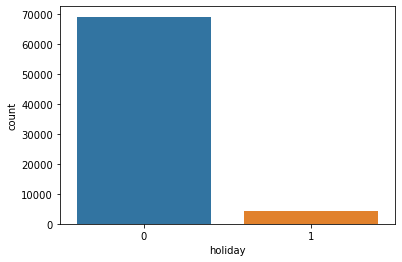

In [8]:
sns.countplot(df.holiday)

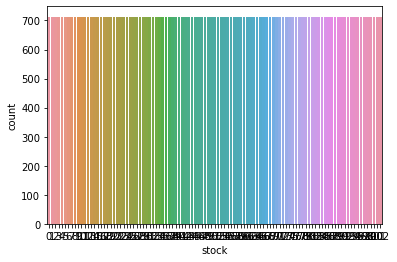

In [9]:
sns.countplot(df.stock)

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format= '%Y-%m-%d')

In [11]:
df.head()

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7
3,id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7
4,id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7


In [12]:
df['month']=df['Date'].dt.month 

df['day']=df['Date'].dt.day 

df['year'] = df['Date'].dt.year


In [13]:
df.head()

,ID,stock,Date,Open,High,Low,Close,holiday,unpredictability_score,month,day,year
0,id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7,1,3,2017
1,id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7,1,4,2017
2,id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7,1,5,2017
3,id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7,1,6,2017
4,id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7,1,9,2017


In [14]:
df = df.drop('Date',axis=1)

In [15]:
corr = df.corr()
corr_matrix = abs(corr)
print(corr_matrix["unpredictability_score"].sort_values(ascending=False).head(10))

unpredictability_score    1.000000e+00
High                      5.811541e-01
Close                     5.772335e-01
Open                      5.771910e-01
Low                       5.730408e-01
stock                     2.606291e-01
year                      8.388003e-16
month                     8.244564e-17
holiday                   1.561849e-17
day                       1.086791e-17
Name: unpredictability_score, dtype: float64


In [16]:
df = df.drop('day',axis=1)

In [17]:
X = df.drop("unpredictability_score",axis=1)
y = df['unpredictability_score']

In [18]:
X = X.drop('ID',axis=1)

In [19]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=37)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1,n_estimators=500)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
preds_val = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds_val)

0.9905773420479302